<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:

**Student ID**:





## Importing Libraries

First we import libraries that we need for this assignment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [ ]:
X, Y = None, None

### START CODE HERE ###
data = pd.read_csv('data_logistic.csv')

X = data[['X1', 'X2', 'X3']]
Y = data['Y']

print("Features:")
print(X)
print("Y:")
print(Y)

### END CODE HERE ###

print(X.shape)
print(Y.shape)

Features:
              X1           X2          X3
0     212.333644   327.382173  259.683281
1      80.919786  1006.053094  446.516485
2     578.734414   994.692630  690.134343
3     305.032631   129.330782  300.859310
4     619.632739   640.433450  398.845694
...          ...          ...         ...
9995  752.237135   835.993568  903.818416
9996  850.512599   143.955973  999.015570
9997  895.453659   468.734000  912.242197
9998  913.757920   725.527844  777.143559
9999  732.694805   937.894796  751.953946

[10000 rows x 3 columns]
Y:
0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: Y, Length: 10000, dtype: int64
(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:We need to normalize our data before starting the training because normalized data is easier to understand and interpret, as all features are on the same scale and many machine learning algorithms are sensitive to the scale of the features. For example, in the case of gradient descent (used in linear regression, logistic regressions, etc.), if features are not on the same scale, the feature with a larger scale may dominate the objective function, causing the algorithm to take longer to converge.

In [ ]:
### START CODE HERE ###
X_normalized = (X - X.mean()) / X.std()

print("Normalized Features:")
print(X_normalized)

### END CODE HERE ###

Normalized Features:
            X1        X2        X3
0    -1.000611 -0.605340 -0.850177
1    -1.453597  1.730424 -0.202375
2     0.262377  1.691325  0.642316
3    -0.681077 -1.286968 -0.707409
4     0.403354  0.472081 -0.367663
...        ...       ...       ...
9995  0.860443  1.145135  1.383218
9996  1.199200 -1.236633  1.713293
9997  1.354112 -0.118853  1.412425
9998  1.417208  0.764948  0.944001
9999  0.793081  1.495845  0.856662

[10000 rows x 3 columns]


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [ ]:
### START CODE HERE ###
X_normalized = (X - X.mean()) / X.std()
X_normalized.insert(0, 'Bias', 1)
print(X_normalized)
### END CODE HERE ###

print(X.shape)

      Bias        X1        X2        X3
0        1 -1.000611 -0.605340 -0.850177
1        1 -1.453597  1.730424 -0.202375
2        1  0.262377  1.691325  0.642316
3        1 -0.681077 -1.286968 -0.707409
4        1  0.403354  0.472081 -0.367663
...    ...       ...       ...       ...
9995     1  0.860443  1.145135  1.383218
9996     1  1.199200 -1.236633  1.713293
9997     1  1.354112 -0.118853  1.412425
9998     1  1.417208  0.764948  0.944001
9999     1  0.793081  1.495845  0.856662

[10000 rows x 4 columns]
(10000, 3)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [ ]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    Z = np.clip(Z, -100, 100)
    return 1 / (1 + np.exp(-Z))

# Some test samples
print(sigmoid(0))
print(sigmoid(np.array([0, 1, 2])))
print(sigmoid(np.array([[0, 1, 2], [3, 4, 5]])))

    ### END CODE HERE ###

0.5
[0.5        0.73105858 0.88079708]
[[0.5        0.73105858 0.88079708]
 [0.95257413 0.98201379 0.99330715]]


### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [ ]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    m, n = X.shape
    loss = None
    ### START CODE HERE ###

    h = sigmoid(np.dot(X, theta))

    # Computing the loss
    loss=(1/m) * np.sum(-y*np.log(h + 1e-10) - (1-y)*np.log(1-h + 1e-10)) + (regLambda/2)*np.sum(np.square(theta))

    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:A λθj​​ term will be added into the formula and we will calculate the derivative of cost function about θj​.(λ is the regularization parameter and θj​ is the jth parameter value.)

In [ ]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    grad = None
    ### START CODE HERE ###

    h = sigmoid(np.dot(X, theta))
    grad = (1/m) * np.dot(X.T, (h - y)) + regLambda*theta

    grad[0] = (1/m) * np.dot(X.iloc[:, 0].T, (h - y))


    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [ ]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the modelTraining and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is  θ , and the second parameter is a numpy array that contains the loss in each iteration. This array is indicated by loss_history in the code.
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when  θ  stops changing between consecutive iterations. You can detect this convergence when:
||θnew−θold||2<=ϵ,
for some small  ϵ  (e.g,  ϵ=10E−4 ).
For readability, we’d recommend implementing this convergence test as a dedicated function hasConverged.
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []
    ### START CODE HERE ###

    for i in range(maxNumIters):
        theta_old = theta
        grad = computeGradient(theta, X, y, regLambda)
        theta = theta - alpha * grad
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        if hasConverged(theta_old, theta, epsilon):
            break

    ### END CODE HERE ###
    return theta, loss_history

def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''

    ### START CODE HERE ###

    return np.linalg.norm(theta_new - theta_old) <= epsilon

    ### END CODE HERE ###
    return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [ ]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###

print("Loss of each iteration:")
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: {loss}")

print(f"\nFinal theta: {theta}")

### END CODE HERE ###

Loss of each iteration:
Iteration 1: 7.711785846377596
Iteration 2: 13.206003959090337
Iteration 3: 7.821665310785758
Iteration 4: 4.130928406291304
Iteration 5: 4.448011390635048
Iteration 6: 4.859972135250692
Iteration 7: 3.9020560146264742
Iteration 8: 3.8904744689937236
Iteration 9: 2.967930252365527
Iteration 10: 2.998214065049592
Iteration 11: 2.4683478896470206
Iteration 12: 2.4641710378807193
Iteration 13: 2.007585022476988
Iteration 14: 2.005086123613132
Iteration 15: 1.66138390874125
Iteration 16: 1.5883780071979543
Iteration 17: 1.3214748087494075
Iteration 18: 1.2365526401628384
Iteration 19: 0.9863353734794885
Iteration 20: 0.9760355911651204
Iteration 21: 0.8115309689962003
Iteration 22: 0.763029060464295
Iteration 23: 0.6680906145049379
Iteration 24: 0.637719769133332
Iteration 25: 0.5395513398526767
Iteration 26: 0.552545716313244
Iteration 27: 0.5036429410715233
Iteration 28: 0.500974186153149
Iteration 29: 0.4717229276223974
Iteration 30: 0.46306140409866986
Iteration

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X = data.drop('Y', axis=1)
y = data['Y']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=35)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=35)

### END CODE HERE ###

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [ ]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    Y = None
    ### START CODE HERE ###

    h = sigmoid(np.dot(X, theta))
    Y = (h > 0.5).astype(int)

    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: The learning rate and regularization constant are two pivotal parameters in machine learning models. The learning rate, denoted as α, controls the step size during the iterative process of finding the minimum of the loss function. If α is too small, the model may take a long time to converge. On the other hand, if α is too large, the model may overshoot the minimum and fail to converge.

The regularization constant, denoted as λ, helps to avoid overfitting by adding a penalty term to the loss function. A larger λ leads to a simpler model with smaller coefficients, which can help to prevent overfitting. However, if λ is too large, the model may become too simple and underfit the data. Conversely, a smaller λ makes the model more complex, which can lead to overfitting if λ is too small.

In the context of my dataset, I found that both the learning rate and regularization constant worked best at 0.01. This suggests that a moderate learning rate and a small amount of regularization helped to achieve the best balance between bias and variance for my model.

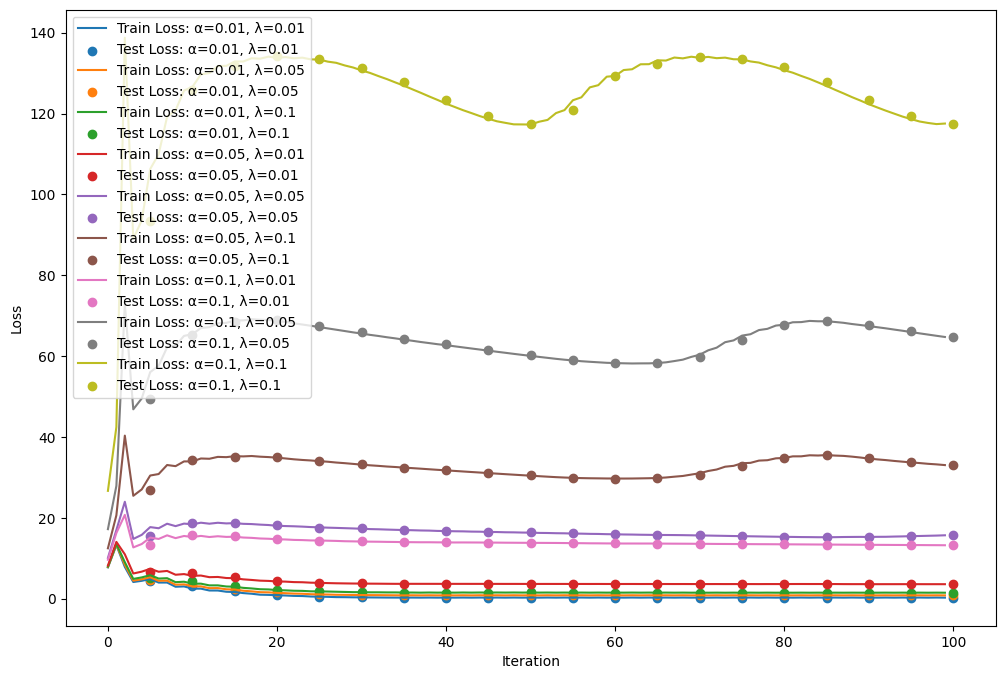

In [ ]:
### START CODE HERE ###
import matplotlib.pyplot as plt

# Define the learning rates and regularization constants
learning_rates = [0.01, 0.05, 0.1]
reg_constants = [0.01, 0.05, 0.1]

# Initialize a figure for the plots
plt.figure(figsize=(12, 8))

# Loop over the learning rates and regularization constants
for alpha in learning_rates:
    for regLambda in reg_constants:
        test_losses = []
        num_iters = []
        for i in range(5, 101, 5):
            # Fit the model and get the loss history
            theta, loss_history = fit(X_train, y_train, regLambda=regLambda, alpha=alpha, maxNumIters=i)

            # Predict on the test set
            y_pred = predict(X_test, theta)

            # Compute the test loss
            test_losses.append(computeCost(theta, X_test, y_test, regLambda))
            num_iters.append(i)

        # Plot the train loss history
        plt.plot(loss_history, label=f'Train Loss: α={alpha}, λ={regLambda}')


        # Add a point for the test loss
        plt.scatter(num_iters, test_losses, label=f'Test Loss: α={alpha}, λ={regLambda}')

# Add labels and legend to the plot
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

### END CODE HERE ###

In [ ]:
# Fit the model with the best parameters and get the loss history
theta, loss_history = fit(X_train, y_train, regLambda=0.01, alpha=0.01, maxNumIters=100)

# Predict on the test set
y_pred = predict(X_test, theta)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy of this classifier on the test set is {accuracy * 100:2f} %")

The accuracy of this classifier on the test set is 99.000000 %


## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: The accuracy of the GaussianNB classifier on the test set is 93.6 %

In [ ]:
### START CODE HERE ###
# Initialize the GaussianNB classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy of the GaussianNB classifier on the test set is {accuracy * 100:2f} %")

### END CODE HERE ###

The accuracy of the GaussianNB classifier on the test set is 93.600000 %


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: The accuracy of the LinearDiscriminantAnalysis classifier on the test set is 99.3 %

In [ ]:
### START CODE HERE ###
# Initialize the LinearDiscriminantAnalysis classifier
clf = LinearDiscriminantAnalysis()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy of the LinearDiscriminantAnalysis classifier on the test set is {accuracy * 100} %")

### END CODE HERE ###

The accuracy of the LinearDiscriminantAnalysis classifier on the test set is 99.3 %


## Conclusion

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: the best method for classifying this dataset's data has been been shown to be the LDA classifier, which resulted in an accuracy of 99.3% on the test set!